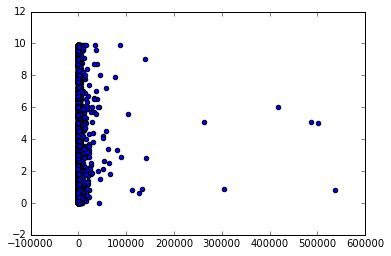

In [1]:
# Homework Set 3
# Carlos Lizama - N17866309
#
# Description: My solutions for homework set 3. I first look into the .csv file to see which companies have
# available the market capitalization information. The ones that do not are dropped. Then I look for the info in 
# yahoo finance. I do two inquiries in order to not to crush the website. Finally I obtain the companies for which
# mkt cap. and real data is available and plot the scatter plot.

import matplotlib.pyplot as plt
import requests
import re
%matplotlib inline

url = 'http://finance.yahoo.com/d/quotes.csv'
f = open('company_list_corrected.csv')  # open csv with companies. It must be in the pwd.
req_info = 'a'    # required info to be obtained from yahoo. k2=Change percent (real time)
                  # Note: k2 seems not to be available. The only thing to do is to change k2 for the
                  # right code according to the required information. I'm using 'a' only because it seems to be
                  # more data available. For the purpose of the course, I think it does not make much difference

# these arrays will store info about companies that have info, ie, the ones with N/A are not taken into account.
Codes = []
MktCaps = []

f.__next__()  # skip first line in the file. I know what the headers are.

for line in f:
    x = line.split('",')
    code = x[0]         # symbol of company in the current line.
    mktcap = x[-1]      # mkt cap (string) of the company in current line
    
    r = re.search('\d\.\d',mktcap) # check whether there is info of capitalization in the .csv file
                                   # when there's no info, the observation is dropped. 
    
    # In this part I obtain the market capitalization. Note that it is expressed in millions.
    if r:
        m = re.search('[MB]',mktcap)  # check if number is expressed in million, billions, etc.
        if m:
            if m.group(0)=='B':
                number = re.split('B',mktcap)
                mktcap = float(number[0])*1000
            elif m.group(0)=='M':
                number = re.split('M',mktcap)
                mktcap = float(number[0])
        else:
            number = re.split(r'\n',mktcap)
            mktcap = float(number[0])/1000
        
        Codes.append(code[1:])
        MktCaps.append(mktcap)
    
f.close()    

n = len(Codes)
n2 = n/2              # I will do two inqueries, with only one the website crushes.

long_string1 = ''      # create an array with the first half of codes
for i in range(int(n2)):
    long_string1=long_string1+'+'+Codes[i]

long_string1 = long_string1[1:]  # eliminate the first '+' at the beginning.

long_string2 = ''      # create an array with the second half of codes
for i in range(int(n2)):
    long_string2=long_string2+'+'+Codes[int(n2)+i]

long_string2 = long_string2[1:]  # eliminate the first '+' at the beginning.


# request data from yahoo    
req1 = requests.get(url+'?s='+long_string1+'&f='+req_info)
req2 = requests.get(url+'?s='+long_string2+'&f='+req_info)

# unpack information 
info1 = re.split(r'\n',req1.text)
del info1[-1]                     # last element is just an empty space since last line ends with '\n'
info2 = re.split(r'\n',req2.text)
del info2[-1]
Info = info1 + info2

# in these arrays I save the info of the companies which have available info about mktcap and percent change.
Codes2 = []
MktCap2 = []
Percents = []

count = 0
for info in Info:
    m = re.search('\d\.\d',info)
    if m:
        Percents.append(float(m.group(0)))
        Codes2.append(Codes[count])
        MktCap2.append(MktCaps[count])
        count+=1

plt.scatter(MktCap2,Percents)


